### GT 유사도 데이터 csv만들기
- similars_src 사용
- df : 다운받은 gt데이터


In [1]:
import sqlite3
import requests

# 데이터베이스 파일 다운로드 (로컬 환경용)
db_url = "http://labrosa.ee.columbia.edu/~dpwe/tmp/lastfm_similars.db"
db_path = "lastfm_similars.db"

# 파일 다운로드
response = requests.get(db_url)
with open(db_path, "wb") as f:
    f.write(response.content)

print("Database downloaded successfully.")

Database downloaded successfully.


In [2]:
# 데이터베이스 연결
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# 테이블 목록 조회
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", tables)

conn.close()

Tables: [('similars_src',), ('similars_dest_tmp',), ('similars_dest',)]


In [3]:
conn = sqlite3.connect("lastfm_similars.db")
print('We count the number of songs with at least one known similar')
sql = "SELECT DISTINCT tid FROM similars_src"
res = conn.execute(sql)

We count the number of songs with at least one known similar


In [4]:
#src
import pandas as pd

table_name = "similars_src"

# 데이터 조회
df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

# DataFrame 형태로 출력
df.head()

,tid,target
0,TRCCCYE12903CFF0E9,"TRHZRQH128F92F9AC2,0.498053,TRZQUEN12903CBFFBB..."
1,TRCCCPM12903CBEEE5,"TRNRRXT12903CFAD5A,1,TRWVNWV12903CBEEE7,0.5238..."
2,TRCCCFH12903CEBC70,"TRRGGCN128F92E3579,0.646036,TRTVJGV128F424A147..."
3,TRCCCJT128F429FFF6,"TRZSKOT128F429FFFC,1,TRYVKKD12903CEB9E2,1,TRVC..."
4,TRCCCBJ128F4286E6F,"TRHUKZN128F428B2BD,1,TRMMPCY128F4253A20,0.9906..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584897 entries, 0 to 584896
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tid     584897 non-null  object
 1   target  584897 non-null  object
dtypes: object(2)
memory usage: 8.9+ MB


In [ ]:
print(df['target'][0])

example = df['target'][0].split(',')
print(len(example))

TRHZRQH128F92F9AC2,0.498053,TRZQUEN12903CBFFBB,0.498053,TRIRQTJ12903CAC5C4,0.498053,TRNLGXS12903CBFF8E,0.498053,TRXAOIV12903CAC665,0.498053,TRYZKLF12903CBFF67,0.498053,TRNUWOI12903CBFF80,0.495826,TRXUNFQ12903CBFFB4,0.495826,TRRLBAR128F930C30F,0.484695,TRYZRKX128F932E8B4,0.483479,TRPHFTX128F92F9BA5,0.481284,TRKAPJT128F92F9BB1,0.481284,TRRFXSC128F932A9A4,0.477824,TRUDHGP128F934447B,0.47291,TRWCOWR128F9344482,0.470635,TRSJKVQ128F145E2EE,0.465952,TRPBXXS128F9346E21,0.465922,TRWRPII128F145E3CE,0.464278,TRNEDZA128F1459BA3,0.461378,TRPUMBJ128F9351158,0.461378,TRQHFFW128F934292E,0.458449,TRTHLAC128F93428C9,0.458449,TRBCGLO128F1459005,0.45085,TRLIPZO128F429E752,0.45085,TRTWQZD128F1458DC0,0.443595,TRKCNMH128F92FC002,0.425407,TRYOUSE12903CAC641,0.421402,TRCVZYG12903CC06BF,0.408971,TRDWUHX128F92F940F,0.40521,TRONQTG128F92F57A6,0.40521,TRCOLCP128EF340466,0.396879,TRHCTQY128F1461B77,0.379198,TRCBOLM128F93005F2,0.372515,TRUTWPA128F9351065,0.372515,TRTJNHL128F92CF1C9,0.368123,TRYCFZE128F147E560,0.3663

In [ ]:
len(df)

584897

In [5]:
df['target'] = df['target'].apply(lambda x: x.split(','))

In [9]:
print(df['target'][0])

['TRHZRQH128F92F9AC2', '0.498053', 'TRZQUEN12903CBFFBB', '0.498053', 'TRIRQTJ12903CAC5C4', '0.498053', 'TRNLGXS12903CBFF8E', '0.498053', 'TRXAOIV12903CAC665', '0.498053', 'TRYZKLF12903CBFF67', '0.498053', 'TRNUWOI12903CBFF80', '0.495826', 'TRXUNFQ12903CBFFB4', '0.495826', 'TRRLBAR128F930C30F', '0.484695', 'TRYZRKX128F932E8B4', '0.483479', 'TRPHFTX128F92F9BA5', '0.481284', 'TRKAPJT128F92F9BB1', '0.481284', 'TRRFXSC128F932A9A4', '0.477824', 'TRUDHGP128F934447B', '0.47291', 'TRWCOWR128F9344482', '0.470635', 'TRSJKVQ128F145E2EE', '0.465952', 'TRPBXXS128F9346E21', '0.465922', 'TRWRPII128F145E3CE', '0.464278', 'TRNEDZA128F1459BA3', '0.461378', 'TRPUMBJ128F9351158', '0.461378', 'TRQHFFW128F934292E', '0.458449', 'TRTHLAC128F93428C9', '0.458449', 'TRBCGLO128F1459005', '0.45085', 'TRLIPZO128F429E752', '0.45085', 'TRTWQZD128F1458DC0', '0.443595', 'TRKCNMH128F92FC002', '0.425407', 'TRYOUSE12903CAC641', '0.421402', 'TRCVZYG12903CC06BF', '0.408971', 'TRDWUHX128F92F940F', '0.40521', 'TRONQTG128F92F57

In [6]:
df['target'] = df['target'].apply(lambda row: {row[n]: row[n+1] for n in range(0, len(row), 2)})

In [7]:
print(df['target'][0])
print(len(df['target'][0]))

{'TRHZRQH128F92F9AC2': '0.498053', 'TRZQUEN12903CBFFBB': '0.498053', 'TRIRQTJ12903CAC5C4': '0.498053', 'TRNLGXS12903CBFF8E': '0.498053', 'TRXAOIV12903CAC665': '0.498053', 'TRYZKLF12903CBFF67': '0.498053', 'TRNUWOI12903CBFF80': '0.495826', 'TRXUNFQ12903CBFFB4': '0.495826', 'TRRLBAR128F930C30F': '0.484695', 'TRYZRKX128F932E8B4': '0.483479', 'TRPHFTX128F92F9BA5': '0.481284', 'TRKAPJT128F92F9BB1': '0.481284', 'TRRFXSC128F932A9A4': '0.477824', 'TRUDHGP128F934447B': '0.47291', 'TRWCOWR128F9344482': '0.470635', 'TRSJKVQ128F145E2EE': '0.465952', 'TRPBXXS128F9346E21': '0.465922', 'TRWRPII128F145E3CE': '0.464278', 'TRNEDZA128F1459BA3': '0.461378', 'TRPUMBJ128F9351158': '0.461378', 'TRQHFFW128F934292E': '0.458449', 'TRTHLAC128F93428C9': '0.458449', 'TRBCGLO128F1459005': '0.45085', 'TRLIPZO128F429E752': '0.45085', 'TRTWQZD128F1458DC0': '0.443595', 'TRKCNMH128F92FC002': '0.425407', 'TRYOUSE12903CAC641': '0.421402', 'TRCVZYG12903CC06BF': '0.408971', 'TRDWUHX128F92F940F': '0.40521', 'TRONQTG128F92F57

#### 정리한 데이터 불러오기
- data : 불러온 csv
- train test split 필요함 
    - train: 1889, test: 473

In [8]:
import pandas as pd

path = '../data_v2/intersec_lyrics_cleaned_0316.csv'
data = pd.read_csv(path)
data.head()

,genre,track_id,artist_name,title,lyrics
0,classic pop and rock,TRWUBTF128F4278A66,Blue Oyster Cult,The Red & The Black,"Canadian Mounted , baby Police force at work R..."
1,classic pop and rock,TRMMSXG128F4260B30,Blue Oyster Cult,I'm On The Lamb But I Ain't No Sheep,"Canadian Mounted, baby Police force at work Re..."
2,classic pop and rock,TRWWXBZ128F92C2C0D,Blue Oyster Cult,Kick Out The Jams,"Well, I feel pretty good And I guess that I co..."
3,classic pop and rock,TRGEFJN128F4270A69,Blue Oyster Cult,7 Screaming Diz-Busters,They held their heads with laughs of pain They...
4,classic pop and rock,TRWVTKP128EF362538,Tone-Loc,All Through The Night,"Whoa! Lord have mercy Aah, baby, c'mon Yeah H..."


In [9]:
track_id = data['track_id'].tolist()
print(len(track_id))

2362


In [10]:
# train test split
import random

random.seed(42)
shuffled_track_id = random.shuffle(track_id)

# train: test = 6:4
train = track_id[:int(len(track_id)*0.6)]
test = track_id[int(len(track_id)*0.6):]

print(f'train: {len(train)}, test: {len(test)}')

train: 1417, test: 945


In [ ]:
# mp3 폴더 내에 train, test 폴더 생성 및 분류
data_list = {'train': train, 'test': test}

import json
json.dump(data_list, open('data_list.json', 'w'))

### GT내에서 불러온 데이터 csv의 교집합만 남기기

##### 전체 데이터 기준으로 한 것

In [11]:
df_filtered_total = df[df['tid'].isin(track_id)]


df_filtered_total = df_filtered_total.copy()
df_filtered_total['target'] = df_filtered_total['target'].apply(lambda x: {k: v for k, v in x.items() if k in track_id})

df_filtered_total['target'] = df_filtered_total.apply(lambda row: {k: v for k, v in row['target'].items() if k not in row['tid']}, axis=1)
df_filtered_total_2 = df_filtered_total[df_filtered_total['target'].apply(lambda x: len(x) > 0)]


In [ ]:
a = 0
num = [len(df_filtered_total_2['target'].iloc[i]) for i in range(len(df_filtered_total_2))]
num = sorted(num)

# 평균 개수
average = sum(num) / len(num)
print(f'average : {average}')

# 최대 / 최소 개수
print(f'max : {max(num)}')
print(f'min : {min(num)}')

average : 2.8484848484848486
max : 17
min : 1


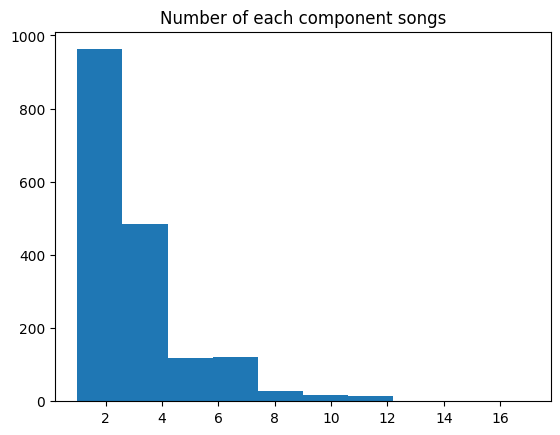

In [86]:
import matplotlib.pyplot as plt

plt.hist(num, bins=10)
plt.title('Number of each component songs')
plt.show()

#### test 데이터 기준으로 한 것

In [67]:
# 앵커 기준 filter
df_filtered = df[df['tid'].isin(test)]
print(len(df_filtered))
df_filtered.head()

945


,tid,target
7670,TRHCNNA128F42366CA,"{'TRYWJVF128F4278063': '0.187117', 'TRJWUCM128..."
7707,TRHCUXA128F9314D98,"{'TRTVRVD128F428C6D9': '0.41784', 'TRGLGCD128F..."
7798,TRHJUBR128F92E7447,"{'TRTRORP128F92E744E': '1', 'TREZPZC128F92E744..."
7936,TRHHSQQ12903CD3181,"{'TRSWKPR12903CD3185': '1', 'TRIDKAZ12903CD318..."
7939,TRHHFRP128F4292954,"{'TRNVFWA128F4293187': '1', 'TRTURZM128F42A1C1..."


In [69]:
# 각 앵커에 속하는 노래 filter
df_filtered = df_filtered.copy()
df_filtered['target'] = df_filtered['target'].apply(lambda x: {k: v for k, v in x.items() if k in test})
df_filtered.head()

,tid,target
7670,TRHCNNA128F42366CA,{}
7707,TRHCUXA128F9314D98,{}
7798,TRHJUBR128F92E7447,{'TRGXNYW128F92E745F': '0.029664'}
7936,TRHHSQQ12903CD3181,{}
7939,TRHHFRP128F4292954,{'TRWPHZV128C71967FC': '0.0755565'}


In [70]:
df_filtered.iloc[2]['target']

{'TRGXNYW128F92E745F': '0.029664'}

In [71]:
# 앵커가 target에 들어가 있는 경우, target에서 앵커 제거
df_filtered['target'] = df_filtered.apply(lambda row: {k: v for k, v in row['target'].items() if k not in row['tid']}, axis=1)
print(len(df_filtered))
df_filtered.head()

945


,tid,target
7670,TRHCNNA128F42366CA,{}
7707,TRHCUXA128F9314D98,{}
7798,TRHJUBR128F92E7447,{'TRGXNYW128F92E745F': '0.029664'}
7936,TRHHSQQ12903CD3181,{}
7939,TRHHFRP128F4292954,{'TRWPHZV128C71967FC': '0.0755565'}


In [72]:
# 속한 노래가 없는 경우는 제거
df_filtered_2 = df_filtered[df_filtered['target'].apply(lambda x: len(x) > 0)]
df_filtered_2.info()
print(len(df_filtered_2))

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 7798 to 485620
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tid     491 non-null    object
 1   target  491 non-null    object
dtypes: object(2)
memory usage: 11.5+ KB
491


In [73]:
a = 0
num = [len(df_filtered_2['target'].iloc[i]) for i in range(len(df_filtered_2))]
num = sorted(num)

# 평균 개수
average = sum(num) / len(num)
print(f'average : {average}')

# 최대 / 최소 개수
print(f'max : {max(num)}')
print(f'min : {min(num)}')

average : 1.580448065173116
max : 7
min : 1


-> 최종 1749개의 유사도 데이터
- 각 유사도 데이터에는 평균 146.9개의 노래가 속해 있음
- 속한 개수의 최대 658, 최소 11개

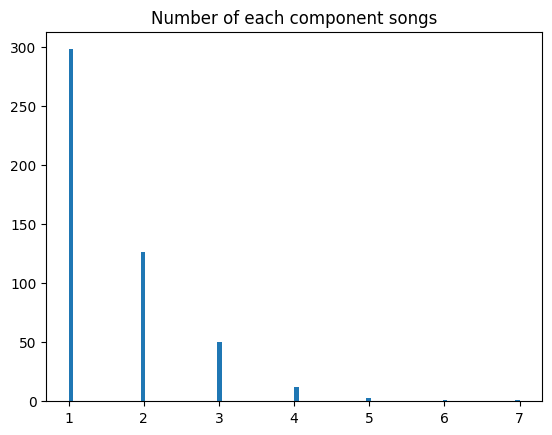

In [75]:
import matplotlib.pyplot as plt

plt.hist(num, bins=100)
plt.title('Number of each component songs')
plt.show()

In [62]:
sim = df_filtered['target'].apply(lambda x: list(x.values()))
total_sim = [value for item in sim for value in item]
print(len(sim))
print(len(total_sim))


1749
257049


In [ ]:
total_sim = sorted(total_sim)
print(total_sim[:10])
print(total_sim[-1000:-900])
print(f'max : {max(total_sim)}')
print(f'min : {min(total_sim)}')
print(f'median : {total_sim[len(total_sim)//2]}')

['0.000100035', '0.000100076', '0.000100126', '0.000100189', '0.000100189', '0.000100189', '0.00010026', '0.000100361', '0.000100538', '0.000100542']
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
max : 9.99271e-05
min : 0.000100035
median : 0.0382303


: 

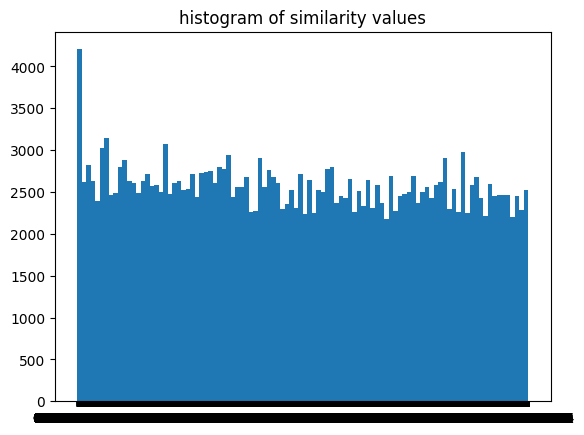

In [ ]:
plt.hist(total_sim, bins=100)
plt.title('histogram of similarity values')
plt.show()

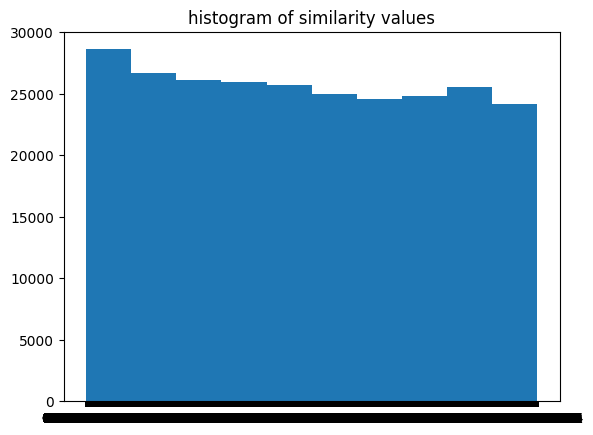

In [67]:
plt.hist(total_sim, bins=10)
plt.title('histogram of similarity values')
plt.show()

### 전체 데이터로 filtering -> 집합 보면서 가져오기

In [14]:
df_filtered_total_2 = df_filtered_total_2.sort_values(by='target', key=lambda x: x.str.len(), ascending=False)
print(df_filtered_total_2.head())
print(df_filtered_total_2.tail())

df_filtered_total_num = df_filtered_total_2['target'].apply(lambda x: len(x))

                       tid                                             target
140636  TRHZMUG128E0781AE5  {'TRHBELU128F4247AB2': '0.318704', 'TRGTKJT128...
204612  TRMUTED128F424BE70  {'TRMGSBG128F429F025': '0.70773', 'TRGATEY128E...
201158  TRMGSBG128F429F025  {'TRMAKGI128F92E9CE1': '0.868005', 'TRGATEY128...
143799  TRHQBNG128F9300881  {'TRMVLBT128EF35709B': '0.723071', 'TRGHUBA128...
441773  TRWGXUB128F14602E4  {'TRMSQJX12903CB4AE9': '0.485153', 'TRMGSBG128...
                       tid                                 target
16235   TRMBAXZ12903CF4300  {'TRWNGCN12903CBE6C5': '0.000987384'}
197158  TRMEMXA128F92D737F    {'TRMRSCF128F933B1F0': '0.0402924'}
134112  TRHBPBW128F92F1EEF    {'TRWQWKI128F4261FF6': '0.0668683'}
484367  TRGQVKR128F4264494     {'TRMIGXF128F4276F34': '0.056267'}
134956  TRHNZLZ128F9326731      {'TRGJJNJ128F14586FA': '0.05113'}


#### 집합 내 노래 개수에 따른 총 노래 개수 확인 (중복 제거 X)

In [ ]:
# 10개 이상의 노래를 가진 집합만 가져옴
aaa = df_filtered_total_num.apply(lambda x: x > 9)
print(f'앵커의 개수 : {aaa.sum()}')
print(f'총 노래의 개수 : {df_filtered_total_num[aaa].sum()}')

앵커의 개수 : 25
총 노래의 개수 : 284


In [106]:
# 9개 이상의 노래를 가진 집합만 가져옴
bbb = df_filtered_total_num.apply(lambda x: x > 8)
print(f'앵커의 개수 : {bbb.sum()}')
print(f'총 노래의 개수 : {df_filtered_total_num[bbb].sum()}')

앵커의 개수 : 33
총 노래의 개수 : 356


In [107]:
# 8개 이상의 노래를 가진 집합만 가져옴
ccc = df_filtered_total_num.apply(lambda x: x > 7)
print(f'앵커의 개수 : {ccc.sum()}')
print(f'총 노래의 개수 : {df_filtered_total_num[ccc].sum()}')

앵커의 개수 : 62
총 노래의 개수 : 588


In [130]:
# 7개 이상의 노래를 가진 집합만 가져옴
ddd = df_filtered_total_num.apply(lambda x: x > 6)
print(f'앵커의 개수 : {ddd.sum()}')
print(f'총 노래의 개수 : {df_filtered_total_num[ddd].sum()}')

앵커의 개수 : 113
총 노래의 개수 : 945


#### 집합 내 노래 개수에 따른 총 노래 개수 확인 (중복 제거 O)

In [ ]:
# 8개 이상의 노래를 가진 집합의 노래 가져옴
track_id_anchor = set(df_filtered_total_2[ccc]['tid'].tolist())
print(f'앵커 개수 : {len(track_id_anchor)}')

track_id_value = []
track_id_value.extend(
    key 
    for n in range(len(df_filtered_total_2[ccc])) 
    for key in df_filtered_total_2[ccc]['target'].iloc[n].keys()
)
print(f'집합 내 노래 개수 (중복 제거 전) : {len(track_id_value)}')

track_id_value = set(track_id_value)
print(f'집합 내 노래 개수 (중복 제거 후) : {len(track_id_value)}')

track_id_total = track_id_anchor.union(track_id_value)
print(f'총 노래 개수 (앵커 + 타겟) : {len(track_id_total)}')

앵커 개수 : 62
집합 내  노래 개수 (중복 제거 전) : 588
집합 내  노래 개수 (중복 제거 후) : 208
총 노래 개수 (앵커 + 타겟) : 227


In [143]:
# 7개 이상의 노래를 가진 집합의 노래 가져옴
track_id_anchor = set(df_filtered_total_2[ddd]['tid'].tolist())
print(f'앵커 개수 : {len(track_id_anchor)}')

track_id_value = []
track_id_value.extend(
    key 
    for n in range(len(df_filtered_total_2[ddd])) 
    for key in df_filtered_total_2[ddd]['target'].iloc[n].keys()
)
print(f'집합 내 노래 개수 (중복 제거 전) : {len(track_id_value)}')

track_id_value = set(track_id_value)
print(f'집합 내 노래 개수 (중복 제거 후) : {len(track_id_value)}')

print()

track_id_total = track_id_anchor.union(track_id_value)
print(f'총 노래 개수 (앵커 + 타겟) : {len(track_id_total)}')

앵커 개수 : 113
집합 내 노래 개수 (중복 제거 전) : 945
집합 내 노래 개수 (중복 제거 후) : 309

총 노래 개수 (앵커 + 타겟) : 343


In [15]:
# 5개 이상의 노래를 가진 집합만 가져옴
nnn = df_filtered_total_num.apply(lambda x: x > 4)
print(f'앵커의 개수 : {nnn.sum()}')
print(f'총 노래의 개수 : {df_filtered_total_num[nnn].sum()}')

track_id_anchor = set(df_filtered_total_2[nnn]['tid'].tolist())
print(f'앵커 개수 : {len(track_id_anchor)}')

track_id_value = []
track_id_value.extend(
    key 
    for n in range(len(df_filtered_total_2[nnn])) 
    for key in df_filtered_total_2[nnn]['target'].iloc[n].keys()
)
print(f'집합 내 노래 개수 (중복 제거 전) : {len(track_id_value)}')

track_id_value = set(track_id_value)
print(f'집합 내 노래 개수 (중복 제거 후) : {len(track_id_value)}')

print()

track_id_total = track_id_anchor.union(track_id_value)
print(f'총 노래 개수 (앵커 + 타겟) : {len(track_id_total)}')

앵커의 개수 : 302
총 노래의 개수 : 1961
앵커 개수 : 302
집합 내 노래 개수 (중복 제거 전) : 1961
집합 내 노래 개수 (중복 제거 후) : 560

총 노래 개수 (앵커 + 타겟) : 656


### threshold 선택

In [ ]:
# 집합 내 노래 개수가 7개 이상의 노래를 가진 집합만
df_final_gt = df_filtered_total_2[ddd].copy()
df_final_gt.head()

,tid,target
140636,TRHZMUG128E0781AE5,"{'TRHBELU128F4247AB2': '0.318704', 'TRGTKJT128..."
204612,TRMUTED128F424BE70,"{'TRMGSBG128F429F025': '0.70773', 'TRGATEY128E..."
201158,TRMGSBG128F429F025,"{'TRMAKGI128F92E9CE1': '0.868005', 'TRGATEY128..."
143799,TRHQBNG128F9300881,"{'TRMVLBT128EF35709B': '0.723071', 'TRGHUBA128..."
441773,TRWGXUB128F14602E4,"{'TRMSQJX12903CB4AE9': '0.485153', 'TRMGSBG128..."


thresholding & 노래 개수에 제한 있을 때, 앵커 개수 : 78
앵커별 평균 노래 개수 :6.089743589743589


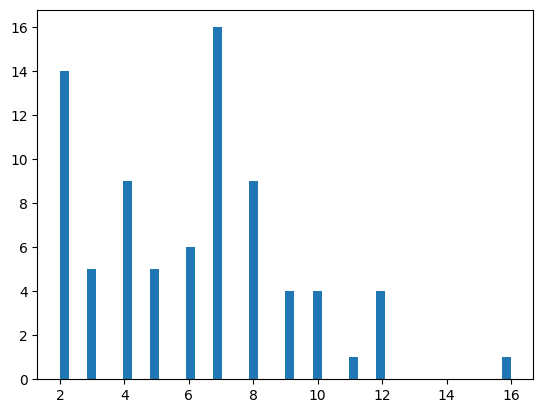

앵커 노래 개수 합 : 78
앵커 내 노래 개수 합: 475
최종 노래 개수 : 175


In [ ]:
df_final_thresholding = df_final_gt.copy()
df_final_thresholding['target'] = df_final_thresholding['target'].apply(lambda x: {k: v for k, v in x.items() if float(v) > 0.1}) # threshold : 0.1

df_final_thresholding_nonzero = df_final_thresholding[df_final_thresholding['target'].apply(lambda x: len(x) > 1)] # 2개 이상의 노래만 가져옴
print(f'thresholding & 노래 개수에 제한 있을 때, 앵커 개수 : {len(df_final_thresholding_nonzero)}')

df_final_thresholding_num = df_final_thresholding_nonzero['target'].apply(lambda x: len(x)).tolist()

print(f'앵커별 평균 노래 개수 :{sum(df_final_thresholding_num)/len(df_final_thresholding_num)}')

plt.hist(df_final_thresholding_num, bins=50)
plt.show()

# 노래 개수
df_final_thresholding_anchor = df_final_thresholding_nonzero['tid'].tolist()
df_final_thresholding_value = []
df_final_thresholding_value.extend(
    key 
    for n in range(len(df_final_thresholding_nonzero)) 
    for key in df_final_thresholding_nonzero['target'].iloc[n].keys()
)

df_final_thresholding_total = set(df_final_thresholding_anchor + df_final_thresholding_value)

print(f'앵커 노래 개수 합 : {len(df_final_thresholding_anchor)}')
print(f'앵커 내 노래 개수 합: {len(df_final_thresholding_value)}')
print(f'최종 노래 개수 : {len(df_final_thresholding_total)}')

thresholding & 노래 개수에 제한 있을 때, 앵커 개수 : 135
앵커별 평균 노래 개수 :5.0


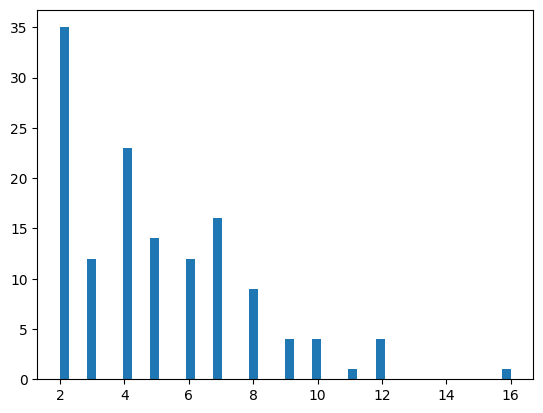

앵커 노래 개수 합 : 135
앵커 내 노래 개수 합: 675
최종 노래 개수 : 242


In [ ]:
# 집합 내 노래 개수가 5개 이상의 노래를 가진 집합만
import matplotlib.pyplot as plt
df_final_gt = df_filtered_total_2[nnn].copy()


df_final_thresholding = df_final_gt.copy()
df_final_thresholding['target'] = df_final_thresholding['target'].apply(lambda x: {k: v for k, v in x.items() if float(v) > 0.1}) # threshold : 0.1

df_final_thresholding_nonzero = df_final_thresholding[df_final_thresholding['target'].apply(lambda x: len(x) > 1)] # 2개 이상의 노래만 가져옴
print(f'thresholding & 노래 개수에 제한 있을 때, 앵커 개수 : {len(df_final_thresholding_nonzero)}')

df_final_thresholding_num = df_final_thresholding_nonzero['target'].apply(lambda x: len(x)).tolist()

print(f'앵커별 평균 노래 개수 :{sum(df_final_thresholding_num)/len(df_final_thresholding_num)}')

plt.hist(df_final_thresholding_num, bins=50)
plt.show()

# 노래 개수
df_final_thresholding_anchor = df_final_thresholding_nonzero['tid'].tolist()
df_final_thresholding_value = []
df_final_thresholding_value.extend(
    key 
    for n in range(len(df_final_thresholding_nonzero)) 
    for key in df_final_thresholding_nonzero['target'].iloc[n].keys()
)

df_final_thresholding_total = set(df_final_thresholding_anchor + df_final_thresholding_value)

print(f'앵커 노래 개수 합 : {len(df_final_thresholding_anchor)}')
print(f'앵커 내 노래 개수 합: {len(df_final_thresholding_value)}')
print(f'최종 노래 개수 : {len(df_final_thresholding_total)}')

In [ ]:
df_final_thresholding_nonzero.to_csv(
    r'C:\Users\user1\Desktop\SimSong\data_v2\gt_sim.csv', 
    index=False, 
    encoding='utf-8'
)